In [ ]:
import requests

url = "https://api.usaspending.gov/api/v2/search/spending_by_award/"

payload = {
    "filters": {
        "time_period": [
            {"start_date": "2023-01-01", "end_date": "2023-12-31"}
        ],
        "award_type_codes": ["A","B","C","D"]
    },
    "fields": [
        "Base Obligation Date",
        "Award Amount",
        "Recipient Name",
        "Description"
    ],
    "limit": 5
}

response = requests.post(url, json=payload)
data = response.json()

# Mostrar los resultados
data


{'spending_level': 'awards',
 'limit': 5,
 'results': [{'internal_id': 350479995,
   'Base Obligation Date': '2023-12-31',
   'Award Amount': 2718.57,
   'Recipient Name': 'PAJU SANITATION CORP.',
   'Description': 'STAND ALONE CAR DEC 2023',
   'generated_internal_id': 'CONT_AWD_W91QVN24F5018_9700_W91QVN23A0015_9700'},
  {'internal_id': 350479993,
   'Base Obligation Date': '2023-12-31',
   'Award Amount': 7889.61,
   'Recipient Name': 'KOREA HOUSING MANAGEMENT CO.,LTD',
   'Description': 'STAND ALONE CAR DEC 2023',
   'generated_internal_id': 'CONT_AWD_W91QVN24F5017_9700_W91QVN19D0046_9700'},
  {'internal_id': 350193100,
   'Base Obligation Date': '2023-12-31',
   'Award Amount': 126244.26,
   'Recipient Name': 'GPC CONSOLIDATED REPORTING',
   'Description': 'CONSOLIDATED QUARTERLY (1QFY24) REPORTING OF GPC PURCHASES ABOVE THE MPT MADE IN USD.',
   'generated_internal_id': 'CONT_AWD_W912PF24PV002_9700_-NONE-_-NONE-'},
  {'internal_id': 350193099,
   'Base Obligation Date': '2023-12-3

In [ ]:
import pandas as pd

# Convertir lista de resultados a DataFrame
df = pd.DataFrame(data["results"])

# Guardar a CSV
df.to_csv("compras_api.csv", index=False)

# Guardar a JSON
df.to_json("compras_api.json", orient="records", indent=2)

df.head()  # Muestra los primeros 5 registros


,internal_id,Base Obligation Date,Award Amount,Recipient Name,Description,generated_internal_id
0,350479995,2023-12-31,2718.57,PAJU SANITATION CORP.,STAND ALONE CAR DEC 2023,CONT_AWD_W91QVN24F5018_9700_W91QVN23A0015_9700
1,350479993,2023-12-31,7889.61,"KOREA HOUSING MANAGEMENT CO.,LTD",STAND ALONE CAR DEC 2023,CONT_AWD_W91QVN24F5017_9700_W91QVN19D0046_9700
2,350193100,2023-12-31,126244.26,GPC CONSOLIDATED REPORTING,CONSOLIDATED QUARTERLY (1QFY24) REPORTING OF G...,CONT_AWD_W912PF24PV002_9700_-NONE-_-NONE-
3,350193099,2023-12-31,232440.24,GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,CONSOLIDATED QUARTERLY (1QFY24) REPORTING OF G...,CONT_AWD_W912PF24PV001_9700_-NONE-_-NONE-
4,349199182,2023-12-31,520635.33,GOVERNMENT ACQUISITIONS INC,RENEWAL FY24 NUTANIX LICENSE,CONT_AWD_W9113M24F0005_9700_W52P1J16D0019_9700


In [ ]:
# Guardar DataFrame en CSV
df.to_csv("compras_api.csv", index=False)

# Guardar DataFrame en JSON
df.to_json("compras_api.json", orient="records", indent=2)

print("Archivos guardados correctamente")


Archivos guardados correctamente


In [ ]:
# Crear columna tipo de activo según descripción
def tipo_activo(desc):
    desc = desc.lower()
    if "it" in desc or "computer" in desc:
        return "Computadora"
    elif "furniture" in desc or "desk" in desc:
        return "Mobiliario"
    elif "license" in desc:
        return "Licencia de software"
    else:
        return "Otro"

df["Tipo de Activo"] = df["Description"].apply(tipo_activo)
df["Fecha de Compra"] = df["Base Obligation Date"]
df["Costo"] = df["Award Amount"]
df["Proveedor"] = df["Recipient Name"]

# Asignar vida útil aproximada
def vida_util(tipo):
    if tipo == "Computadora":
        return 5
    elif tipo == "Mobiliario":
        return 10
    elif tipo == "Licencia de software":
        return 3
    else:
        return 5

df["Vida Útil (años)"] = df["Tipo de Activo"].apply(vida_util)
df["Ubicación"] = "ACC – Campus Principal"

# Mostrar tabla final de activos fijos
df_final = df[["Tipo de Activo","Fecha de Compra","Costo","Proveedor","Vida Útil (años)","Ubicación"]]
df_final


,Tipo de Activo,Fecha de Compra,Costo,Proveedor,Vida Útil (años),Ubicación
0,Otro,2023-12-31,2718.57,PAJU SANITATION CORP.,5,ACC – Campus Principal
1,Otro,2023-12-31,7889.61,"KOREA HOUSING MANAGEMENT CO.,LTD",5,ACC – Campus Principal
2,Otro,2023-12-31,126244.26,GPC CONSOLIDATED REPORTING,5,ACC – Campus Principal
3,Otro,2023-12-31,232440.24,GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,5,ACC – Campus Principal
4,Licencia de software,2023-12-31,520635.33,GOVERNMENT ACQUISITIONS INC,3,ACC – Campus Principal


In [ ]:
# Guardar la tabla final de activos fijos
df_final.to_csv("activos_fijos_acc.csv", index=False)
df_final.to_json("activos_fijos_acc.json", orient="records", indent=2)

print("Tabla final de activos fijos guardada correctamente")


Tabla final de activos fijos guardada correctamente


In [ ]:
from google.colab import files

# Descargar CSV
files.download("activos_fijos_acc.csv")

# Descargar JSON
files.download("activos_fijos_acc.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

os.getcwd()


'/content'

In [ ]:
import os

os.getcwd()


'/content'

In [ ]:
import os
os.listdir("/content")


['.config', 'sample_data']

In [ ]:
from google.colab import files
files.upload()


Saving activos_fijos_acc.json to activos_fijos_acc.json
Saving activos_fijos_acc.csv to activos_fijos_acc.csv


{'activos_fijos_acc.json': b'[\n  {\n    "Tipo de Activo":"Otro",\n    "Fecha de Compra":"2023-12-31",\n    "Costo":2718.57,\n    "Proveedor":"PAJU SANITATION CORP.",\n    "Vida \\u00datil (a\\u00f1os)":5,\n    "Ubicaci\\u00f3n":"ACC \\u2013 Campus Principal"\n  },\n  {\n    "Tipo de Activo":"Otro",\n    "Fecha de Compra":"2023-12-31",\n    "Costo":7889.61,\n    "Proveedor":"KOREA HOUSING MANAGEMENT CO.,LTD",\n    "Vida \\u00datil (a\\u00f1os)":5,\n    "Ubicaci\\u00f3n":"ACC \\u2013 Campus Principal"\n  },\n  {\n    "Tipo de Activo":"Otro",\n    "Fecha de Compra":"2023-12-31",\n    "Costo":126244.26,\n    "Proveedor":"GPC CONSOLIDATED REPORTING",\n    "Vida \\u00datil (a\\u00f1os)":5,\n    "Ubicaci\\u00f3n":"ACC \\u2013 Campus Principal"\n  },\n  {\n    "Tipo de Activo":"Otro",\n    "Fecha de Compra":"2023-12-31",\n    "Costo":232440.24,\n    "Proveedor":"GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING",\n    "Vida \\u00datil (a\\u00f1os)":5,\n    "Ubicaci\\u00f3n":"ACC \\u2013 Campus Pr

In [ ]:
import json
from pprint import pprint

with open("activos_fijos_acc.json", "r", encoding="utf-8") as f:
    data_json = json.load(f)

pprint(data_json)


[{'Costo': 2718.57,
  'Fecha de Compra': '2023-12-31',
  'Proveedor': 'PAJU SANITATION CORP.',
  'Tipo de Activo': 'Otro',
  'Ubicación': 'ACC – Campus Principal',
  'Vida Útil (años)': 5},
 {'Costo': 7889.61,
  'Fecha de Compra': '2023-12-31',
  'Proveedor': 'KOREA HOUSING MANAGEMENT CO.,LTD',
  'Tipo de Activo': 'Otro',
  'Ubicación': 'ACC – Campus Principal',
  'Vida Útil (años)': 5},
 {'Costo': 126244.26,
  'Fecha de Compra': '2023-12-31',
  'Proveedor': 'GPC CONSOLIDATED REPORTING',
  'Tipo de Activo': 'Otro',
  'Ubicación': 'ACC – Campus Principal',
  'Vida Útil (años)': 5},
 {'Costo': 232440.24,
  'Fecha de Compra': '2023-12-31',
  'Proveedor': 'GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING',
  'Tipo de Activo': 'Otro',
  'Ubicación': 'ACC – Campus Principal',
  'Vida Útil (años)': 5},
 {'Costo': 520635.33,
  'Fecha de Compra': '2023-12-31',
  'Proveedor': 'GOVERNMENT ACQUISITIONS INC',
  'Tipo de Activo': 'Licencia de software',
  'Ubicación': 'ACC – Campus Principal',
  'Vida 

In [ ]:
import pandas as pd

df_json = pd.read_json("activos_fijos_acc.json")
df_json


,Tipo de Activo,Fecha de Compra,Costo,Proveedor,Vida Útil (años),Ubicación
0,Otro,2023-12-31,2718.57,PAJU SANITATION CORP.,5,ACC – Campus Principal
1,Otro,2023-12-31,7889.61,"KOREA HOUSING MANAGEMENT CO.,LTD",5,ACC – Campus Principal
2,Otro,2023-12-31,126244.26,GPC CONSOLIDATED REPORTING,5,ACC – Campus Principal
3,Otro,2023-12-31,232440.24,GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,5,ACC – Campus Principal
4,Licencia de software,2023-12-31,520635.33,GOVERNMENT ACQUISITIONS INC,3,ACC – Campus Principal


In [ ]:
import pandas as pd

df = pd.read_csv("activos_fijos_acc.csv")
df


,Tipo de Activo,Fecha de Compra,Costo,Proveedor,Vida Útil (años),Ubicación
0,Otro,2023-12-31,2718.57,PAJU SANITATION CORP.,5,ACC – Campus Principal
1,Otro,2023-12-31,7889.61,"KOREA HOUSING MANAGEMENT CO.,LTD",5,ACC – Campus Principal
2,Otro,2023-12-31,126244.26,GPC CONSOLIDATED REPORTING,5,ACC – Campus Principal
3,Otro,2023-12-31,232440.24,GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,5,ACC – Campus Principal
4,Licencia de software,2023-12-31,520635.33,GOVERNMENT ACQUISITIONS INC,3,ACC – Campus Principal


In [ ]:
# Normalización de columnas

df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("ó", "o")
      .str.replace("í", "i")
      .str.replace("á", "a")
      .str.replace("é", "e")
      .str.replace("ú", "u")
      .str.replace("ñ", "n")
)

df


,tipo_de_activo,fecha_de_compra,costo,proveedor,vida_util_(anos),ubicacion
0,Otro,2023-12-31,2718.57,PAJU SANITATION CORP.,5,ACC – Campus Principal
1,Otro,2023-12-31,7889.61,"KOREA HOUSING MANAGEMENT CO.,LTD",5,ACC – Campus Principal
2,Otro,2023-12-31,126244.26,GPC CONSOLIDATED REPORTING,5,ACC – Campus Principal
3,Otro,2023-12-31,232440.24,GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,5,ACC – Campus Principal
4,Licencia de software,2023-12-31,520635.33,GOVERNMENT ACQUISITIONS INC,3,ACC – Campus Principal


In [ ]:
import pandas as pd

df = pd.read_csv("activos_fijos_acc.csv")

# Normalizar nombres de columnas
#Qué revisar: Número de registros,Tipos de datos (fecha, numérico, texto), Valores faltantes (en este caso, no hay)

df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("ó", "o")
      .str.replace("í", "i")
      .str.replace("á", "a")
      .str.replace("é", "e")
      .str.replace("ú", "u")
      .str.replace("ñ", "n")
)

# Convertir fecha
df["fecha_de_compra"] = pd.to_datetime(df["fecha_de_compra"])

df


,tipo_de_activo,fecha_de_compra,costo,proveedor,vida_util_(anos),ubicacion
0,Otro,2023-12-31,2718.57,PAJU SANITATION CORP.,5,ACC – Campus Principal
1,Otro,2023-12-31,7889.61,"KOREA HOUSING MANAGEMENT CO.,LTD",5,ACC – Campus Principal
2,Otro,2023-12-31,126244.26,GPC CONSOLIDATED REPORTING,5,ACC – Campus Principal
3,Otro,2023-12-31,232440.24,GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,5,ACC – Campus Principal
4,Licencia de software,2023-12-31,520635.33,GOVERNMENT ACQUISITIONS INC,3,ACC – Campus Principal


In [ ]:
# Estadísticas descriptivas del costo
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tipo_de_activo    5 non-null      object        
 1   fecha_de_compra   5 non-null      datetime64[ns]
 2   costo             5 non-null      float64       
 3   proveedor         5 non-null      object        
 4   vida_util_(anos)  5 non-null      int64         
 5   ubicacion         5 non-null      object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 372.0+ bytes


In [ ]:
df["costo"].describe()


,costo
count,5.000000
mean,177985.602000
std,213718.558606
min,2718.570000
25%,7889.610000
50%,126244.260000
75%,232440.240000
max,520635.330000


In [ ]:
# Compras por tipo de activo
df.groupby("tipo_de_activo").agg(
    cantidad=("costo", "count"),
    costo_total=("costo", "sum"),
    costo_promedio=("costo", "mean")
)


,cantidad,costo_total,costo_promedio
tipo_de_activo,,,
Licencia de software,1,520635.33,520635.33
Otro,4,369292.68,92323.17


In [ ]:
#Proveedores estratégicos
df.groupby("proveedor")["costo"] \
  .sum() \
  .sort_values(ascending=False)


,costo
proveedor,
GOVERNMENT ACQUISITIONS INC,520635.33
GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING,232440.24
GPC CONSOLIDATED REPORTING,126244.26
"KOREA HOUSING MANAGEMENT CO.,LTD",7889.61
PAJU SANITATION CORP.,2718.57


In [ ]:
# Vida útil de los activos
df.groupby("vida_util_(anos)")["costo"].agg(
    cantidad="count",
    costo_total="sum"
)


,cantidad,costo_total
vida_util_(anos),,
3,1,520635.33
5,4,369292.68


In [ ]:
# Compras históricas
df.groupby(df["fecha_de_compra"].dt.year)["costo"].sum()



,costo
fecha_de_compra,
2023,889928.01


In [ ]:
!pip install streamlit -q
!pip install pyngrok -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 110.0 MB/s eta 0:00:00


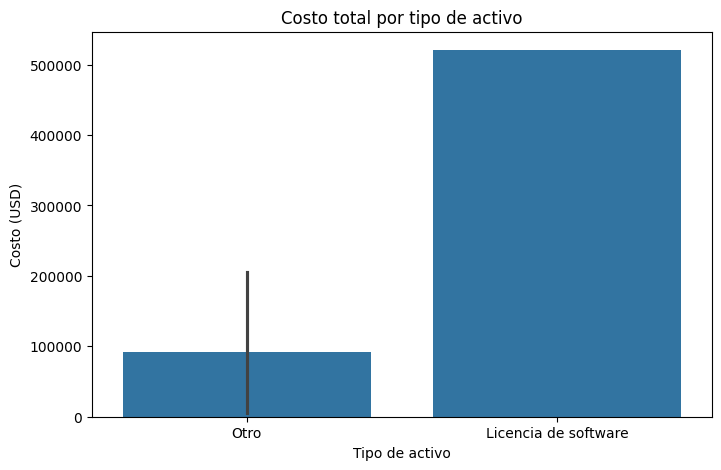

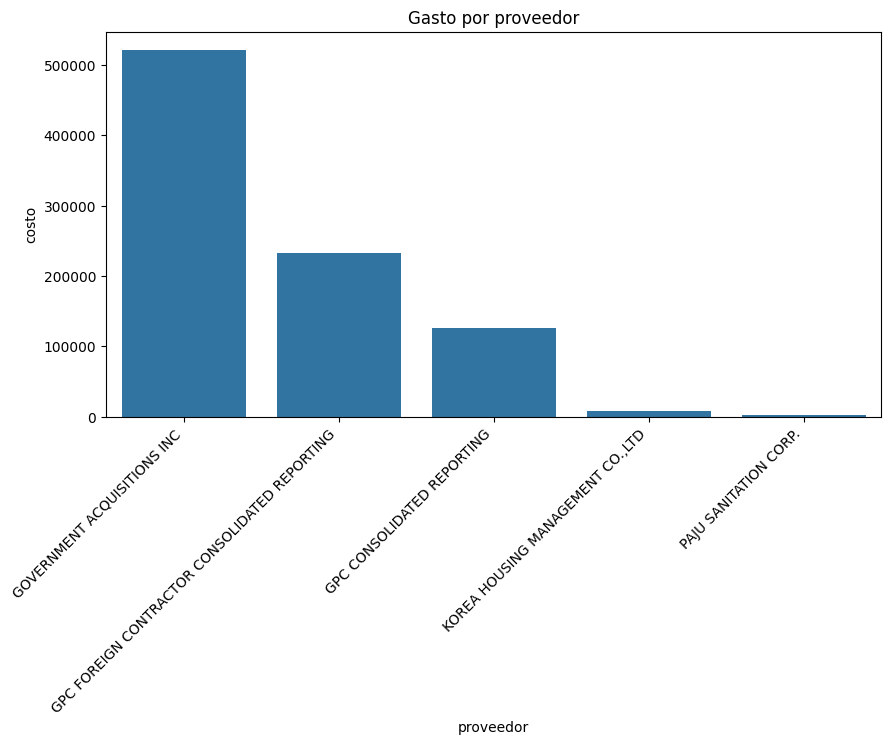

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de costos por tipo de activo
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='tipo_de_activo', y='costo')
plt.title("Costo total por tipo de activo")
plt.ylabel("Costo (USD)")
plt.xlabel("Tipo de activo")
plt.show()

# Costo por proveedor
plt.figure(figsize=(10,5))
top_prov = df.groupby('proveedor')['costo'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=top_prov, x='proveedor', y='costo')
plt.xticks(rotation=45, ha='right')
plt.title("Gasto por proveedor")
plt.show()


In [ ]:
import pandas as pd

# Cargar CSV
df = pd.read_csv("activos_fijos_acc.csv")

# Normalizar columnas
df.columns = (
    df.columns
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("ó", "o")
      .str.replace("í", "i")
      .str.replace("á", "a")
      .str.replace("é", "e")
      .str.replace("ú", "u")
      .str.replace("ñ", "n")
)

# Convertir fechas
df["fecha_de_compra"] = pd.to_datetime(df["fecha_de_compra"])

# Estadísticas básicas de costo
estadisticas = df["costo"].describe()
print("🔹 Estadísticas de costo de los activos")
print(estadisticas)

# Total y promedio de gasto por tipo de activo
por_tipo = df.groupby("tipo_de_activo")["costo"].agg(["count", "sum", "mean"])
print("\n🔹 Resumen por tipo de activo")
print(por_tipo)  # ✅ Aquí estaba el error, ahora completo

# Total de gasto por proveedor
por_proveedor = df.groupby("proveedor")["costo"].sum().sort_values(ascending=False)
print("\n🔹 Gasto total por proveedor")
print(por_proveedor)


🔹 Estadísticas de costo de los activos
count         5.000000
mean     177985.602000
std      213718.558606
min        2718.570000
25%        7889.610000
50%      126244.260000
75%      232440.240000
max      520635.330000
Name: costo, dtype: float64

🔹 Resumen por tipo de activo
                      count        sum       mean
tipo_de_activo                                   
Licencia de software      1  520635.33  520635.33
Otro                      4  369292.68   92323.17

🔹 Gasto total por proveedor
proveedor
GOVERNMENT ACQUISITIONS INC                      520635.33
GPC FOREIGN CONTRACTOR CONSOLIDATED REPORTING    232440.24
GPC CONSOLIDATED REPORTING                       126244.26
KOREA HOUSING MANAGEMENT CO.,LTD                   7889.61
PAJU SANITATION CORP.                              2718.57
Name: costo, dtype: float64
